In [1]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import random

In [2]:
age = [random.randint(20 , 60) for _ in range(500)]
salary = [random.randint(20000,80000) for _ in range(500)]
family_mem = [random.randint(3,8) for _ in range(500)]
house = [random.randint(0,1) for _ in range(500)]

data={
    "Age":age,
    "Salary":salary,
    "Family_mem":family_mem,
    "House":house
}
df = pd.DataFrame(data)
df


,Age,Salary,Family_mem,House
0,20,40587,4,0
1,41,31497,3,0
2,41,50648,7,1
3,47,34717,4,1
4,57,75368,4,0
...,...,...,...,...
495,55,58459,7,0
496,31,21761,6,0
497,38,63263,4,0
498,29,51829,5,0


In [3]:
#Binarisation
df["Age"] = pd.qcut(df["Age"],q=2,labels = [0,1]).astype(int)
df["Salary"] = pd.qcut(df["Salary"],q=2,labels = [0,1]).astype(int)
df["Family_mem"] = pd.qcut(df["Salary"],q =2, labels =[0,1]).astype(int)
df

,Age,Salary,Family_mem,House
0,0,0,0,0
1,0,0,0,0
2,0,1,1,1
3,1,0,0,1
4,1,1,1,0
...,...,...,...,...
495,1,1,1,0
496,0,0,0,0
497,0,1,1,0
498,0,1,1,0


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["House"])
Y = df["House"]

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.3,stratify = Y , random_state = 1)



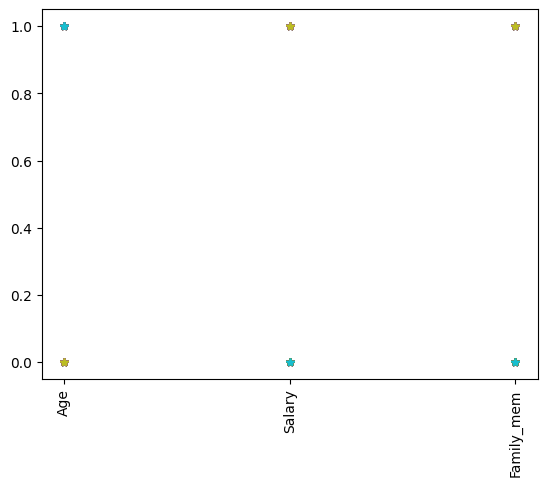

In [5]:
plt.plot(x_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [6]:
b = 3
i = randint(0, x_train.shape[0])
print("for row",i)
if np.sum(x_train.iloc[i,:])>=b:
    print("Buys House")
else:
    print("Doesn't buys House")
if y_train.iloc[i]==1: 
    print("Ground truth Buys House")
else:
    print("Ground truth doesn't buys house")

for row 73
Doesn't buys House
Ground truth Buys House


In [7]:
b = 3
Y_pred = []
x_np = x_train.values
accurate_rows = 0
for x,y in zip(x_np , y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred.append(y_pred)
    if y == y_pred:
        accurate_rows += 1
    print(accurate_rows, accurate_rows/x_np.shape[0])

0 0.0
0 0.0
1 0.002857142857142857
1 0.002857142857142857
2 0.005714285714285714
3 0.008571428571428572
3 0.008571428571428572
4 0.011428571428571429
5 0.014285714285714285
5 0.014285714285714285
5 0.014285714285714285
5 0.014285714285714285
5 0.014285714285714285
6 0.017142857142857144
6 0.017142857142857144
6 0.017142857142857144
7 0.02
7 0.02
7 0.02
7 0.02
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
8 0.022857142857142857
9 0.025714285714285714
10 0.02857142857142857
11 0.03142857142857143
11 0.03142857142857143
12 0.03428571428571429
12 0.03428571428571429
13 0.037142857142857144
14 0.04
14 0.04
14 0.04
15 0.04285714285714286
16 0.045714285714285714
17 0.04857142857142857
18 0.05142857142857143
19 0.054285714285714284
19 0.054285714285714284
20 0.05714285714285714
21 0.06
22 0.06285714285714286
22 0.06285714285714286
22 0.06285714285714286
23 0.06571428571428571
23 0

In [8]:
from sklearn.metrics import accuracy_score
b = 177
x_np = x_test.values.astype(int)
Y_pred_test = []
for x in x_np:
    y_pred = (np.sum(x)>=b)
    Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_pred_test, y_test)

print(b, accuracy)

177 0.52
